<a href="https://colab.research.google.com/github/Lokkamithran/FYP/blob/main/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

from tensorflow.keras.preprocessing.text import one_hot
from numpy.random import seed
import matplotlib.pyplot as plt

seed(42)
tf.random.set_seed(42)

In [ ]:
vocab_size = 100000

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/fyp/saves/dataset.csv", sep='`' )

In [ ]:
df['Fine Tag'] = df.apply(lambda row: 0 if row['Fine Tag'] == "Not_offensive" else 1, axis=1)

In [ ]:
df.head()

,Fine Tag,Coarse Tag,Comment
0,0,Offensive_Untargeted,VISWASAM Movie Pathutu Yarellaam inka Vantheen...
1,0,Offensive_Untargeted,viswasam trailer ah pathutu enga vanthavanga y...
2,0,Offensive_Targeted_Insult_Individual,Thooku duraiyin aattatai trailerla pathutu ya...
3,0,Offensive_Untargeted,Yaarellam viswasam trailer pathathuku Apparam...
4,0,Offensive_Targeted_Insult_Individual,“Adha vida koduma kaanama pona crush correct a...


In [ ]:
df = df.dropna()
df = df.sample(frac=1.0).reset_index(drop=True)
x = df["Comment"]
y = df["Fine Tag"]

In [ ]:
encoding = [one_hot(words,vocab_size) for words in x]
emb_doc = pad_sequences(encoding, padding='pre', maxlen=100)

# import pickle
# with open("lstm_one_hot.pkl", "wb") as f:
#     pickle.dump(one_hot, f)

In [ ]:
final_x = np.array(emb_doc)
final_y = np.array(y)

In [ ]:
final_x[9072:]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0, 58267, 83486, 41144, 46066, 62079,
        21463]], dtype=int32)

9073

In [ ]:
# k fold
k = 5
n = df.shape[0]

batch = n//(k)

eval_metrics = []

for end_ind in range( batch, n, batch ):
  start_ind = end_ind-batch

  x_test = final_x[ start_ind : end_ind ]
  y_test = final_y[ start_ind : end_ind ]

  x_train = np.append( final_x[:start_ind], final_x[end_ind:] )
  y_train = np.append( final_y[:start_ind], final_y[end_ind:] )

  model=Sequential()
  model.add(Embedding(vocab_size,50,input_length=100))
  model.add((LSTM(50)))
  model.add(Dense(1,activation='sigmoid'))

  model.compile(
      loss='binary_crossentropy',
      optimizer='adam',
      metrics=['binary_accuracy']
  )

  noOfEpochs = 5
  history = model.fit(
      x_train,
      y_train,
      validation_data=(x_test, y_test),
      epochs=noOfEpochs,
      batch_size= 64 )

  predictions = model.predict(x_test)
  new_list = []
  for i in range(0,predictions.size):
      value = predictions[i][0]
      new_list.append(0 if (value<0.5) else 1)

  tn, fp, fn, tp = confusion_matrix(y_test, new_list).ravel()
  # print(tn, fp, fn, tp)

  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  f1_score = 2/((1/precision)+(1/recall))
  accuracy = tp+tn/( predictions.size )

  print("Precision: ", precision)
  print("Recall: ", recall)
  print("F1 score: ", f1_score)


  eval_metrics.append( {
      "Precision" : precision,
      "Recall" : recall,
      "F1" : f1_score,
      "Accuracy" : accuracy
  })


ValueError: Data cardinality is ambiguous:
  x sizes: 725900
  y sizes: 7259
Make sure all arrays contain the same number of samples.

In [ ]:
# model building
import tensorflow.keras.metrics as metrics

model=Sequential()
model.add(Embedding(vocab_size,50,input_length=100))
model.add((LSTM(50)))
model.add(Dense(1,activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['binary_accuracy']
)

noOfEpochs = 10
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=noOfEpochs,
    batch_size= 64 )



Epoch 1/10
114/114 [==============================] - 19s 152ms/step - loss: 0.6702 - binary_accuracy: 0.5901 - val_loss: 0.6459 - val_binary_accuracy: 0.6501
Epoch 2/10
114/114 [==============================] - 8s 68ms/step - loss: 0.4933 - binary_accuracy: 0.7717 - val_loss: 0.6836 - val_binary_accuracy: 0.6479
Epoch 3/10
114/114 [==============================] - 5s 49ms/step - loss: 0.2380 - binary_accuracy: 0.9073 - val_loss: 0.8941 - val_binary_accuracy: 0.6121
Epoch 4/10
114/114 [==============================] - 2s 21ms/step - loss: 0.1102 - binary_accuracy: 0.9627 - val_loss: 1.1153 - val_binary_accuracy: 0.5917
Epoch 5/10
114/114 [==============================] - 4s 32ms/step - loss: 0.0563 - binary_accuracy: 0.9832 - val_loss: 1.4770 - val_binary_accuracy: 0.6000
Epoch 6/10
114/114 [==============================] - 3s 27ms/step - loss: 0.0362 - binary_accuracy: 0.9877 - val_loss: 1.5512 - val_binary_accuracy: 0.6022
Epoch 7/10
114/114 [==============================] - 3s

In [ ]:
#model = tf.keras.Sequential([
#    x_train,
#    tf.keras.layers.Embedding(
#        input_dim=len(10000),
#        output_dim=64,
#
#        mask_zero=True),
#    tf.keras.layers.LSTM(64),
#    tf.keras.layers.Dense(64, activation='relu'),
#    tf.keras.layers.Dense(7,activation=softmax)])


model=Sequential()
model.add(Embedding(vocab_size,50,input_length=100))
model.add((LSTM(50)))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy', 'precision', 'recall', 'f1'])
print(model.summary())

NameError: name 'model' is not defined

In [ ]:
noOfEpochs = 3
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=noOfEpochs, batch_size=50)

Epoch 1/3
144/144 [==============================] - 22s 136ms/step - loss: 0.6705 - binary_accuracy: 0.5913 - val_loss: 0.6390 - val_binary_accuracy: 0.6435
Epoch 2/3
144/144 [==============================] - 20s 139ms/step - loss: 0.4902 - binary_accuracy: 0.7679 - val_loss: 0.7022 - val_binary_accuracy: 0.6285
Epoch 3/3
144/144 [==============================] - 20s 138ms/step - loss: 0.2503 - binary_accuracy: 0.8997 - val_loss: 0.8569 - val_binary_accuracy: 0.6080


In [ ]:
pickle.dump(model, open('lstm.pkl', 'wb'))

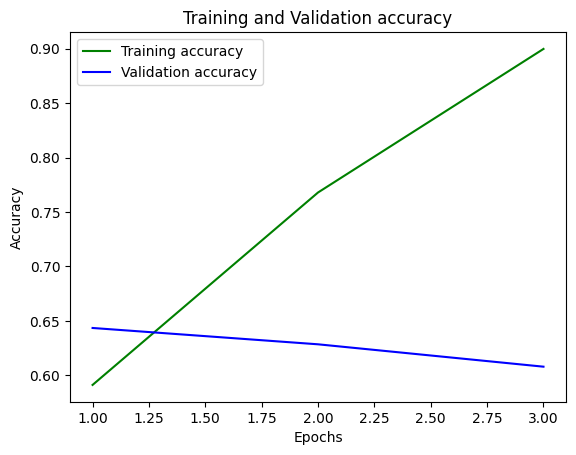

In [ ]:
epochs = range(1,noOfEpochs+1)

acc_train = history.history['binary_accuracy']
acc_val = history.history['val_binary_accuracy']
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

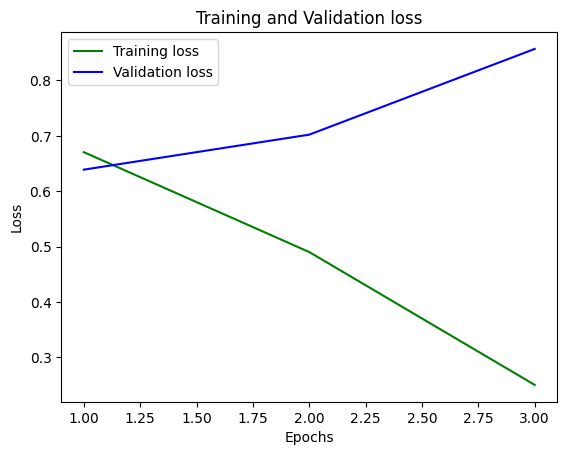

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.save('the_rnn_model.keras')

In [ ]:
loaded_model = tf.keras.models.load_model('content/drive/MyDrive/fyp-batch33')

OSError: No file or directory found at content/drive/MyDrive/fyp-batch33

In [ ]:
sample_text = "nee laam uyir vaala ve kudathu"
test_encoding = [one_hot(sample_text, vocab_size)]
test_emb_doc = pad_sequences(test_encoding, padding="pre", maxlen=100)

predictions = model.predict(np.array(test_emb_doc))
print(predictions[0][0])

# Print the label based on the prediction
if predictions[0] < 0.5:
    print('The comment is positive')
else:
    print('The comment is negative')

1/1 [==============================] - 0s 475ms/step
0.5306632
The comment is negative


In [ ]:
predictions = model.predict(x_test)
new_list = []
for i in range(0,predictions.size):
    value = predictions[i][0]
    new_list.append(0 if (value<0.5) else 1)

tn, fp, fn, tp = confusion_matrix(y_test, new_list).ravel()
# print(tn, fp, fn, tp)

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = 2/((1/precision)+(1/recall))

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)

57/57 [==============================] - 1s 22ms/step
Precision:  0.676496872207328
Recall:  0.6875567665758402
F1 score:  0.681981981981982


In [ ]:
print(new_list)

[0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 

In [ ]:
print(x_test)

[[    0     0     0 ...  9960 63660  7107]
 [    0     0     0 ...  8683 91546 99634]
 [    0     0     0 ... 77884  3566  7156]
 ...
 [    0     0     0 ... 79001 92986 50428]
 [    0     0     0 ... 77884 59246 58267]
 [    0     0     0 ... 85423 98869 53304]]


In [ ]:
print("Accuracy: ", accuracy_score(y_test, new_list))

Accuracy:  0.6079955580233204
